In [1]:
from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
import pandas as pd
import csv
import time
import warnings
import math
warnings.filterwarnings("ignore")

In [3]:
result="./results/results_3.csv" 
csv_files=["all_data.csv"]
path=""
repetition=10

In [4]:
def folder(f_name): 
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

folder_name="./results/"
folder(folder_name)
folder_name="./results/result_graph_3/"
folder(folder_name)

In [5]:
ml_list={
"Naive Bayes":GaussianNB(),
"QDA":QDA(),
"Random Forest":RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
"ID3" :DecisionTreeClassifier(max_depth=5,criterion="entropy"),
"AdaBoost":AdaBoostClassifier(),
"MLP":MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500),
"Nearest Neighbors":KNeighborsClassifier(3)}

7 features that are selected from FS_ALLDATA.ipynb 

In [6]:
features={"all_data":["Bwd Packet Length Std", "Flow Bytes/s", "Total Length of Fwd Packets", "Fwd Packet Length Std",
     "Flow IAT Std", "Flow IAT Min", "Fwd IAT Total","Label"]}

seconds=time.time()

In [7]:
with open(result, "w", newline="",encoding="utf-8") as f:
    wrt = csv.writer(f)
    wrt.writerow(["File","ML algorithm","accuracy","Precision", "Recall" , "F1-score","Time"])

File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
all_data          Naive Bayes        0.82            0.66            0.64            0.65            2.2789         


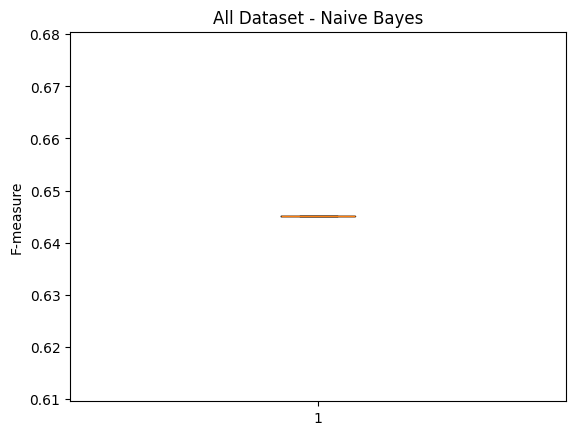

all_data          QDA                0.38            0.58            0.61            0.38            2.7015         


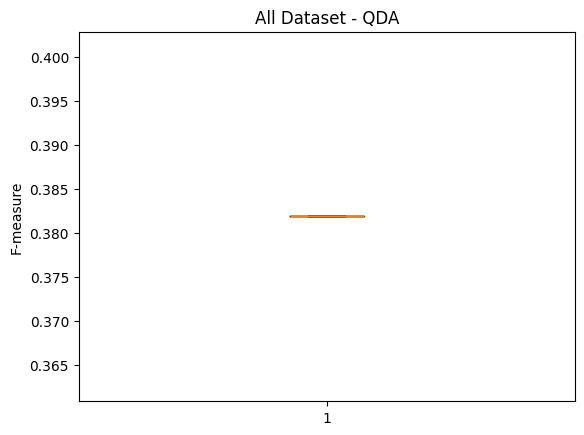

all_data          Random Forest      0.94            0.96            0.82            0.87            29.5719        


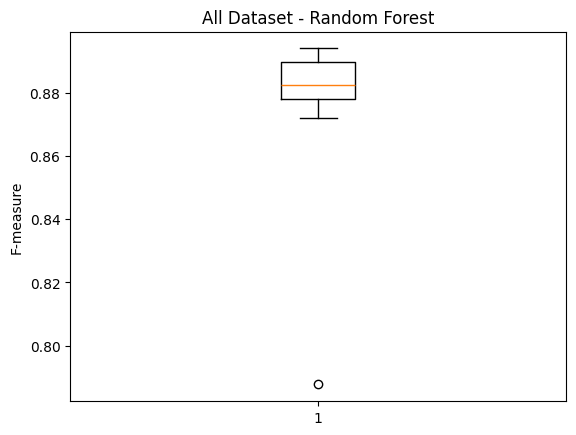

all_data          ID3                0.95            0.93            0.89            0.91            13.8228        


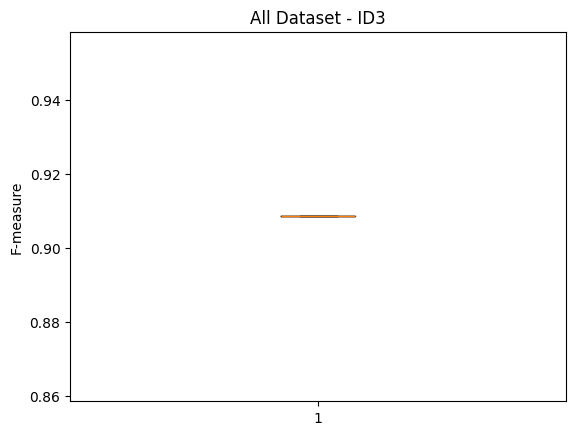

all_data          AdaBoost           0.94            0.93            0.85            0.88            216.3086       


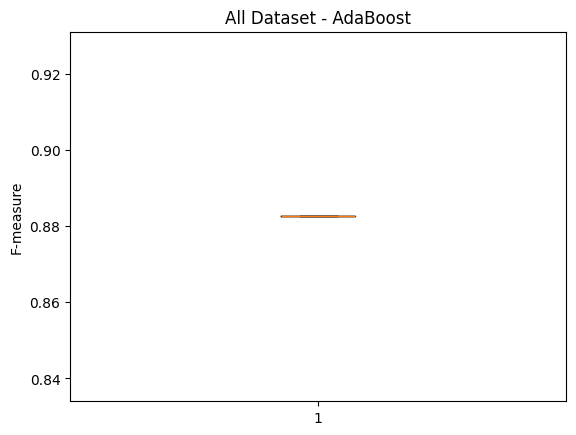

all_data          MLP                0.84            0.72            0.53            0.52            229.5191       


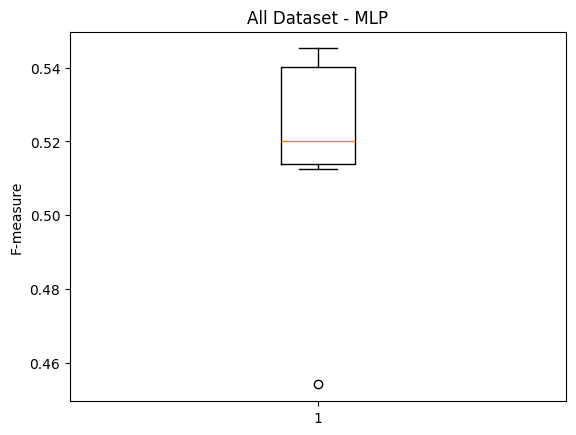

all_data          Nearest Neighbors  0.97            0.94            0.95            0.94            206.3111       


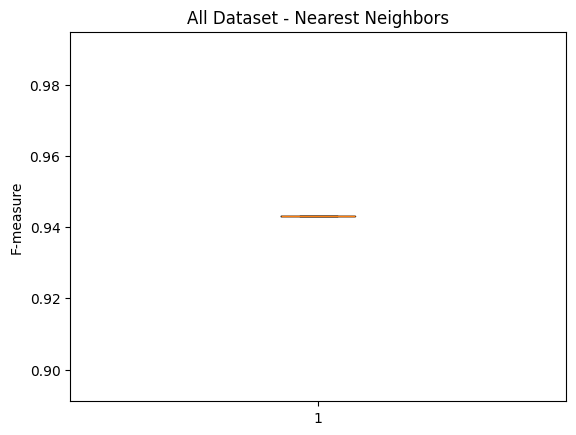

Total operation time: =  7180.757202625275 seconds


In [8]:
for j in csv_files: 
    print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("File","ML algorithm","accuracy","Precision", "Recall" , "F1-score","Time"))  
    feature_list=list(features[j[0:-4]])
    df=pd.read_csv(path+j,usecols=feature_list)
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]: 
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)           
    df["Label"]=attack_or_not

    
    y = df["Label"] 
    del df["Label"]
    feature_list.remove('Label')
    X = df[feature_list]

    
    for ii in ml_list: 
        precision=[]
        recall=[]
        f1=[]
        accuracy=[]
        t_time=[]
        for i in range(repetition): 
            second=time.time()

            # cross-validation
            X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.20, random_state = repetition)

            #machine learning 
            clf = ml_list[ii]#choose algorithm from ml_list dictionary                                                                          
            clf.fit(X_train, y_train)
            predict =clf.predict(X_test)  
            
            f_1=f1_score(y_test, predict, average='macro')
            pr=precision_score(y_test, predict, average='macro')
            rc=recall_score(y_test, predict, average='macro')

            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time()-second)) )


            
        print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (j[0:-4],ii,str(round(np.mean(accuracy),2)),str(round(np.mean(precision),2)), 
            str(round(np.mean(recall),2)),str(round(np.mean(f1),2)),str(round(np.mean(t_time),4))))
        with open(result, "a", newline="",encoding="utf-8") as f: 
            wrt = csv.writer(f)
            for i in range(0,len(t_time)):
                wrt.writerow([j[0:-4],ii,accuracy[i],precision[i],recall[i],f1[i],t_time[i]])
   
        plt.boxplot(f1)
        plt.title("All Dataset - " +str(ii))
        plt.ylabel('F-measure')
        plt.show()
print("Total operation time: = ",time.time()- seconds ,"seconds")